In [1289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#provide two gains chart one for training set and validation set
# or you can do one where you join the train and test set
# were training a model based on train set and seeing how it does on a validation set

In [1290]:
data = pd.read_csv("Cleaned office supply data.csv",index_col=0)# building a model on the train and test set and seeing how it perfroms on the validation set

In [1291]:
X = data.copy()

In [1292]:
X["Date of First Purchase"] = pd.to_datetime(X['Date of First Purchase'],errors = "coerce")

In [1293]:
import datetime
X['length_of_membership'] = datetime.datetime.now().year - X['Date of First Purchase'].dt.year

In [1294]:
X = X.drop("Date of First Purchase",axis=1)


In [1295]:
X.length_of_membership.describe()

count    16158.000000
mean        27.201448
std         10.950024
min          2.000000
25%         23.000000
50%         27.000000
75%         33.000000
max         94.000000
Name: length_of_membership, dtype: float64

In [1296]:
X.dropna(inplace = True)

In [1297]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16158 entries, 0 to 16171
Data columns (total 32 columns):
Customer Number                            16158 non-null float64
Campaign Period Sales                      16158 non-null float64
Historical Sales Volume                    16158 non-null float64
Number of Prior Year Transactions          16158 non-null float64
Do Not Direct Mail Solicit                 16158 non-null float64
Do Not Email                               16158 non-null float64
Do Not Telemarket                          16158 non-null float64
Repurchase Method_NOTICE                   16158 non-null int64
Repurchase Method_PAYMENT PLAN             16158 non-null int64
Last Transaction Channel_BILLING           16158 non-null int64
Last Transaction Channel_BRANCH (PHONE)    16158 non-null int64
Last Transaction Channel_BRANCH (POS)      16158 non-null int64
Last Transaction Channel_IT                16158 non-null int64
Last Transaction Channel_MAIL              16

In [1298]:
y = np.where(X['Campaign Period Sales']>0,1,0)

In [1299]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

In [1300]:
X_train.shape

(8079, 32)

In [1301]:
X_train_nsales = X_train.drop('Campaign Period Sales',axis = 1)
X_test_nsales = X_test.drop('Campaign Period Sales',axis=1)


In [1302]:
y_train_regression = X_train['Campaign Period Sales']
y_test_regression = X_test['Campaign Period Sales']

In [1303]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [1304]:
lgr = LogisticRegression(solver='lbfgs')
forest = RandomForestClassifier(max_depth = 3,n_estimators = 100)

In [1305]:
lgr.fit(X_train_nsales,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [955]:
lgr.score(X_train_nsales,y_train)

0.7276890704295086

In [956]:
forest.fit(X_train_nsales,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [957]:
forest.score(X_train_nsales,y_train)

0.7757148161901225

In [958]:
np.unique(y_train,return_counts = True)[1]/y_train.shape[0]

array([0.72768907, 0.27231093])

In [1306]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [1307]:
rfe = RFE(lgr)
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [1119]:
#rfe.fit(X_train_nsales,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=3,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [727]:
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train_nsales.columns))


[(1, 'Customer Number'),
 (1, 'Do Not Email'),
 (1, 'Historical Sales Volume'),
 (1, 'Language_Not-English'),
 (1, 'Last Transaction Channel_MAIL'),
 (1, 'Last Transaction Channel_WEB'),
 (1, 'Monitor_Y'),
 (1, 'Number of Employees_large'),
 (1, 'Number of Employees_medium'),
 (1, 'Number of Employees_small'),
 (1, 'Number of Prior Year Transactions'),
 (1, 'Office Supplies_Y'),
 (1, 'Printer_Y'),
 (1, 'Repurchase Method_NOTICE'),
 (1, 'length_of_membership'),
 (2, 'Standard Chair_Y'),
 (3, 'Last Transaction Channel_PHONE'),
 (4, 'Computer_Y'),
 (5, 'Do Not Direct Mail Solicit'),
 (6, 'Toner_Y'),
 (7, 'Do Not Telemarket'),
 (8, 'Executive Chair_Y'),
 (9, 'Last Transaction Channel_BRANCH (POS)'),
 (10, 'Last Transaction Channel_missing'),
 (11, 'Last Transaction Channel_BRANCH (PHONE)'),
 (12, 'Number of Employees_unknown'),
 (13, 'Last Transaction Channel_BILLING'),
 (14, 'Desk_Y'),
 (15, 'Last Transaction Channel_IT'),
 (16, 'Insurance_Y'),
 (17, 'Repurchase Method_PAYMENT PLAN')]

In [1308]:
x_e_tr = rfe.fit_transform(X_train_nsales,y_train) # so `15 features(columns) are useful, I will use these features to buiild a model using pipeline
x_e_ts = rfe.transform(X_test_nsales)


In [1309]:
lgr = LogisticRegression(solver='lbfgs')

In [1310]:
adaboost = AdaBoostClassifier(lgr)

In [1311]:
adaboost.fit(x_e_tr,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [1312]:
adascore = adaboost.score(x_e_ts,y_test)

In [1313]:
gradboost = GradientBoostingClassifier()

In [1314]:
gradboost.fit(x_e_tr,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1315]:
gradscore = gradboost.score(x_e_ts,y_test)

In [1316]:
bagging_class = BaggingClassifier(lgr)

In [1317]:
bagging_class.fit(x_e_tr,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None,

In [1318]:
bagscore = bagging_class.score(x_e_ts,y_test)

<BarContainer object of 3 artists>

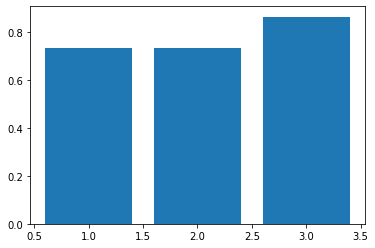

In [1319]:
plt.bar([1,2,3],[bagscore,adascore,gradscore])

In [1320]:
gradboost.score(x_e_tr,y_train)# score for training and test not far apart so gradientboosing does not overfit

0.8734991954449808

In [1152]:
pipe = Pipeline([('rfe',RFE(lgr)),('lgr',LogisticRegression())])

In [1153]:
pipe.fit(X_train_nsales,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('rfe',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='warn',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=None, step=1, verbose=0)),
                ('lgr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True,

In [976]:
pipe.score(X_train_nsales,y_train)

0.7276890704295086

In [977]:
pipe = Pipeline([('rfe',RFE(lgr)),('forest',RandomForestClassifier())])# doing it with random forest creating a random forest with the features selected from RFE

In [978]:
pipe.fit(X_train_nsales,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('rfe',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='warn',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=None, step=1, verbose=0)),
                ('forest',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='

In [979]:
pipe.score(X_train_nsales,y_train)# the model for forest works well with the features from rfe

0.9850228988736229

In [980]:
pipe.score(X_test_nsales,y_test)

0.83933655155341

In [981]:
pipe = Pipeline([('rfe',RFE(estimator = lgr)),('forest',RandomForestClassifier(n_estimators=20))])

In [982]:
params = {'rfe__estimator':[LogisticRegression(solver='lbfgs'),RandomForestClassifier(n_estimators=10)],
                      'forest__max_depth':[i for i in range(3,10)]}
# using gridsearch cv to find the best parameters for our models - hyperparameters tuning
# there should be two undescores between estimator name and pipeline

In [983]:
grid = GridSearchCV(pipe,param_grid=params,cv=5)#estimator=pipeline,param_grid= params

In [984]:
grid.fit(X_train_nsales,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('rfe',
                                        RFE(estimator=LogisticRegression(C=1.0,
                                                                         class_weight=None,
                                                                         dual=False,
                                                                         fit_intercept=True,
                                                                         intercept_scaling=1,
                                                                         l1_ratio=None,
                                                                         max_iter=100,
                                                                         multi_class='warn',
                                                                         n_jobs=None,
                                                          

In [843]:
grid.best_params_ # best max depth 9 from 3 to 10 could do more tuning with parameters

{'forest__max_depth': 9,
 'rfe__estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)}

In [844]:
grid.score(X_train_nsales,y_train)

0.8383463299913355

In [845]:
grid.score(X_test_nsales,y_test) # we have it performing almost identical to train/test set which is good

0.8273301151132566

In [1321]:
X_train['probability'] = gradboost.predict_proba(x_e_tr)[:,1]# predicting probability with best parameters
# were going to use gradient boosting for better results

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [912]:
X_train.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,...,Insurance_Y,Toner_Y,Office Supplies_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English,length_of_membership,probability
861,2297108.0,442.552381,1.210823e+06,19.0,0.0,0.0,0.0,1,0,0,...,0,0,1,0,0,1,0,0,43.0,0.775019
7422,16562316.0,0.000000,1.105157e+04,1.0,0.0,0.0,0.0,1,0,0,...,0,0,1,0,0,1,0,0,13.0,0.326530
6686,14981931.0,253.188000,2.278692e+05,18.0,0.0,1.0,0.0,0,0,0,...,0,0,1,0,0,1,0,0,47.0,0.833034
9090,20255940.0,0.000000,2.046345e+05,24.0,0.0,1.0,0.0,1,0,0,...,0,1,1,0,0,1,0,0,24.0,0.045600
11403,25424586.0,254.853333,3.669888e+04,6.0,0.0,0.0,0.0,1,0,0,...,1,0,1,0,1,0,0,0,27.0,0.725348


In [1322]:
X_test['probability'] = gradboost.predict_proba(x_e_ts)[:,1] # doing the same thing for validation set

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [849]:
X_test.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,...,Insurance_Y,Toner_Y,Office Supplies_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English,length_of_membership,probability
3794,8538686.0,0.000000,3.443578e+05,13.0,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,1,0,0,29.0,0.067721
6529,14661683.0,202.952381,1.540409e+05,23.0,0.0,1.0,0.0,1,0,0,...,0,0,1,0,0,1,0,0,39.0,0.762071
7833,17440302.0,0.000000,3.997175e+05,19.0,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,1,0,0,8.0,0.230015
11571,25825857.0,0.000000,1.799776e+06,23.0,0.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,0,24.0,0.032618
8409,18745655.0,0.000000,1.612585e+06,18.0,0.0,0.0,0.0,0,0,0,...,0,0,1,1,0,0,0,0,25.0,0.120684


In [1333]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [114]:
#lr = LinearRegression()

In [115]:
#lr.fit(X_train_nsales,y_train_regression)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
#lr.score(X_train_nsales,y_train_regression)

0.36750586754790515

In [117]:
#lr.score(X_test_nsales,y_test_regression)

0.34321792947102947

In [126]:
#rfe = RFE(estimator=lr)

In [127]:
#rfe.fit_transform(X_train_nsales,y_train_regression).shape #15 important features

(8079, 15)

In [1341]:
from sklearn.feature_selection import SelectFromModel # transformer for selecting important features
from sklearn.tree import DecisionTreeRegressor

In [1342]:
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [1336]:
sfm = SelectFromModel(DecisionTreeRegressor()) # using decision tree to select important features

In [1343]:
# doing the same thing we did for classification but for regressors 
lr = LinearRegression()
bag_reg = BaggingRegressor(lr)
ada_reg = AdaBoostRegressor(lr)
grad_reg = GradientBoostingRegressor()

In [1344]:
def ensemble_fitter(ens):
    ens.fit(X_train_nsales,y_train_regression)
    rmse_train = np.sqrt(mean_squared_error(y_train_regression,ens.predict(X_train_nsales)))
    rmse_test = np.sqrt(mean_squared_error(y_test_regression,ens.predict(X_test_nsales)))
    return rmse_train,rmse_test

In [1345]:
ensemble_fitter(bag_reg)

(588.7389162880462, 569.0832739524559)

In [1346]:
ensemble_fitter(ada_reg)

(674.2748528355073, 663.7492956363449)

In [1347]:
ensemble_fitter(grad_reg)# gradient boost works the best so were going to use that in our model to predict 

(423.80262768270046, 446.2737271556027)

In [1086]:
pipe = Pipeline([('select',sfm),('sscaler',StandardScaler()),('poly',PolynomialFeatures()),('gboost',grad_reg)])

In [559]:
#pipe = Pipeline([('select',sfm),('sscaler',StandardScaler()),('poly',PolynomialFeatures()),('dtree',DecisionTreeRegressor())])# go back and tune parameters
# explore ways to tweak by model or feature selection
# getting features from sfm,scaling it, using a polynomial on it, and riding
# building polynomial features and building a regression out of it
#cant use RFE it only works for classification problems 

In [ ]:
#params = {'poly__degree':[1,2],'dtree__max_depth':[2,3,4,5]}

In [998]:
params = {'poly__degree':[1,2],'gboost__max_depth':[2,3,4,5,6]}

In [999]:
grid = GridSearchCV(pipe,param_grid = params,cv=5,n_jobs=-1) #njobs =-1 will use all my computer memory processor

In [862]:
grid.fit(X_train_nsales,y_train_regression)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('select',
                                        SelectFromModel(estimator=DecisionTreeRegressor(criterion='mse',
                                                                                        max_depth=None,
                                                                                        max_features=None,
                                                                                        max_leaf_nodes=None,
                                                                                        min_impurity_decrease=0.0,
                                                                                        min_impurity_split=None,
                                                                                        min_samples_leaf=1,
                                                                                        min_

In [627]:
grid.score(X_test_nsales,y_test_regression)

0.5618667779971902

In [1270]:
from sklearn.metrics import mean_squared_error# not going to use r squared to define the success  of the model but rather rmse

In [864]:
ypred_train = grid.predict(X_train_nsales)
ypred_test = grid.predict(X_test_nsales)

In [865]:
mse_train = mean_squared_error(y_train_regression,ypred_train)
mse_test = mean_squared_error(y_test_regression,ypred_test)

In [866]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [867]:
print(f'The Rmse for train:{rmse_train},Rmse for test:{rmse_test}') # about 500 dollars off the prediction

The Rmse for train:387.06278703697336,Rmse for test:468.2544280880813


In [868]:
y_train_regression.mean()

249.82433700599435

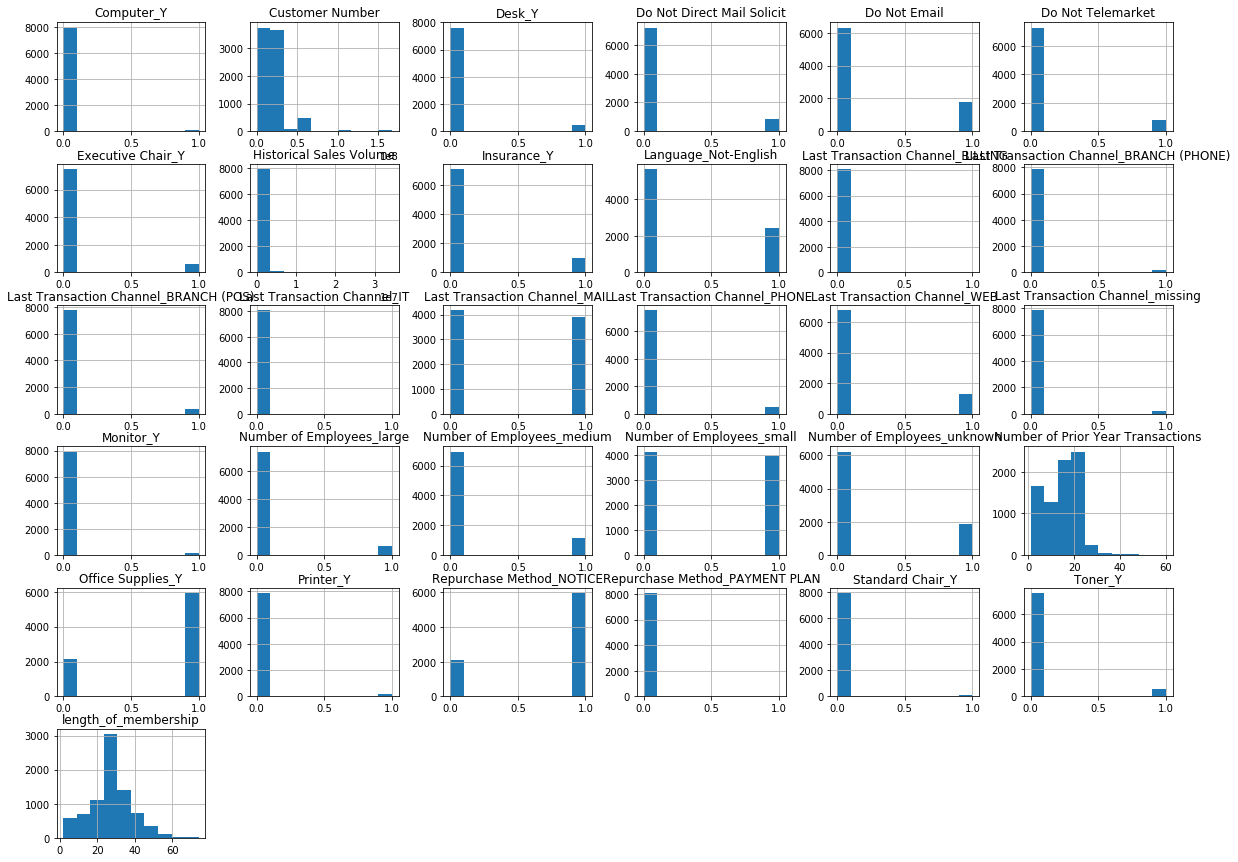

In [583]:
X_train_nsales.hist(figsize=(20,15));

In [1088]:
from sklearn.preprocessing import PowerTransformer

In [1089]:
ptransformer = PowerTransformer()

In [1090]:
ptrain_transformed = ptransformer.fit_transform(X_train_nsales)
ptest_transformed = ptransformer.fit_transform(X_test_nsales)

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [1091]:
transformed_data = pd.DataFrame(p_transformed,columns = X_train_nsales.columns)#.hist(figsize=(20,15));

ValueError: Shape of passed values is (8079, 31), indices imply (8079, 30)

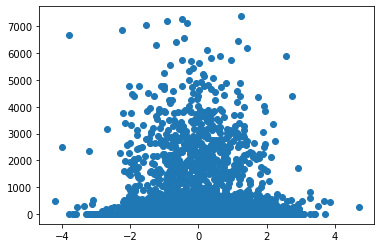

In [1005]:
plt.scatter(transformed_data['Historical Sales Volume'],y_train_regression)

In [1006]:
transformed_data['Historical Sales Volume'].head()

0   -0.064223
1    2.028441
2    0.407168
3   -0.352307
4    0.370139
Name: Historical Sales Volume, dtype: float64

In [1007]:
def ensemble_fitter_transformer(ens):
    ens.fit(ptrain_transformed,y_train_regression)
    rmse_train = np.sqrt(mean_squared_error(y_train_regression,ens.predict(ptrain_transformed)))
    rmse_test = np.sqrt(mean_squared_error(y_test_regression,ens.predict(ptest_transformed)))
    return rmse_train,rmse_test

In [1008]:
ensemble_fitter_transformer(grad_reg)

(412.7767953435633, 469.6545635111958)

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: supplied range of [-inf, 8.917143118836291] is not finite

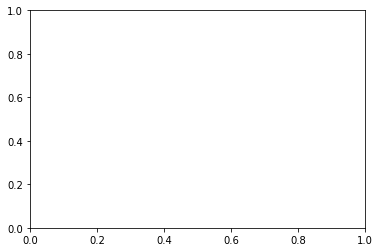

In [581]:
plt.hist(np.log(y_train_regression))# want to normalize this to make it more normal

In [1009]:
y_train_regression.describe() # need to figure what to do with the 0s sales

count    8079.000000
mean      250.031783
std       739.270218
min         0.000000
25%         0.000000
50%         0.000000
75%       146.080000
max      7382.700000
Name: Campaign Period Sales, dtype: float64

In [1010]:
y_train_regression.loc[y_train_regression == 0].value_counts()

0.0    5879
Name: Campaign Period Sales, dtype: int64

In [1348]:
X_train['predict_money'] = grad_reg.predict(X_train_nsales)
X_test['predict_money'] = grad_reg.predict(X_test_nsales)
X_train['predict_money'].head()

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


7893     1189.330618
3806       28.077669
10396     273.383202
16142     -10.363256
9657      303.251044
Name: predict_money, dtype: float64

In [1349]:
X_train['profit'] = .22*X_train['probability']*X_train['predict_money']-8.40*X_train['probability']-45.65

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1366]:
X_test['profit'] = .22*X_test['probability']*X_test['predict_money']-8.40*X_test['probability']-45.65

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [575]:
X_train.iloc[:,-3:]

,probability,predict_money,profit
12696,0.034220,11.769613,-45.848843
8297,0.041786,207.086074,-44.097282
2003,0.032348,-3.151295,-45.944153
10948,0.700102,163.872280,-26.290846
12350,0.174870,31.657141,-45.901013
2206,0.037947,69.866708,-45.385482
2959,0.075702,16.357410,-46.013473
15848,0.044966,90.777396,-45.129700
12843,0.042543,-17.554672,-46.171658
2790,0.075080,37.602327,-45.659572


In [1350]:
X_train['decile'] = pd.qcut(X_train['profit'],10,labels = [i for i in range(1,11)])


C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1367]:
X_test['decile'] = pd.qcut(X_test['profit'],10,labels = [i for i in range(1,11)])

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1376]:
(X_train.groupby('decile')['profit'].mean()).to_frame() # profit is not made until the 10th decile perhaps purchases werent made until that point
# use this to target groups that are profitable


,profit
decile,
1,-46.696058
2,-46.197632
3,-45.943836
4,-45.638984
5,-45.055907
6,-43.894685
7,-41.046388
8,-23.482792
9,-1.110143


In [1279]:
pip install scikit-plot

  Using cached https://files.pythonhosted.org/packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1353]:
import scikitplot as skplt 

In [1362]:
X_train['decile'].head()

7893     9
3806     2
10396    9
16142    3
9657     9
Name: decile, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [1363]:
ldf_train = pd.pivot_table(X_train,values = ["probability","profit","predict_money"],index = "decile",aggfunc={"profit":['sum'],
                                                                                           "predict_money":['sum'],
                                                                                           "probability":["min","max"]})

In [1365]:
ldf_test = pd.pivot_table(X_test,values = ["probability","profit","predict_money"],index = "decile",aggfunc={"profit":['sum'],
                                                                                           "predict_money":['sum'],
                                                                                           "probability":["min","max"]})

KeyError: 'profit'

In [1364]:
ldf

predict_money probability                   profit
                 sum         max       min            sum
decile                                                   
1      -1.244295e+04    0.926837  0.022102  -37917.198849
2      -1.842791e+03    0.270211  0.011989  -39960.952025
3      -1.804781e+03    0.575532  0.008482  -34320.045828
4       3.260069e+04    0.247570  0.008388  -36876.299222
5       6.629830e+04    0.366684  0.012703  -36405.172911
6       1.004297e+05    0.359687  0.021031  -35423.010503
7       1.645224e+05    0.620699  0.028936  -33165.481643
8       2.149443e+05    0.959483  0.043360  -19114.992563
9       2.704495e+05    0.917030  0.127364    -890.334520
10      1.186203e+06    0.991340  0.135302  162492.218890

In [1379]:
ldf['Customer size'] = X_train.groupby('decile')['profit'].size()
ldf

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [320]:
X_train.loc[X_train['decile'] == 10].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,...,Office Supplies_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English,length_of_membership,predict_money,probability,profit
count,8.080000e+02,808.000000,8.080000e+02,808.000000,808.000000,808.000000,808.000000,808.000000,808.0,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,2.491164e+07,1451.487036,1.142535e+06,17.345297,0.115099,0.222772,0.112624,0.617574,0.0,0.001238,...,0.492574,0.059406,0.069307,0.220297,0.589109,0.623762,39.268564,1428.759849,0.707155,179.698403
std,2.407872e+07,1482.560834,1.997432e+06,9.774956,0.319339,0.416364,0.316328,0.486281,0.0,0.035180,...,0.500255,0.236529,0.254133,0.414704,0.492300,0.484741,13.014372,1139.934426,0.182374,221.346281
min,1.008360e+05,0.000000,6.415733e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,197.385844,0.109896,-19.537008
25%,9.170450e+06,175.633810,1.947267e+05,9.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,429.889851,0.614955,5.018962
50%,2.000467e+07,1165.608333,6.341696e+05,18.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,42.000000,1354.246595,0.745555,125.881559
75%,3.019972e+07,2383.343333,1.279531e+06,22.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,48.000000,1978.579172,0.810008,308.397278
max,1.642805e+08,7458.750000,3.441213e+07,57.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,7200.500000,1.000000,1433.694500


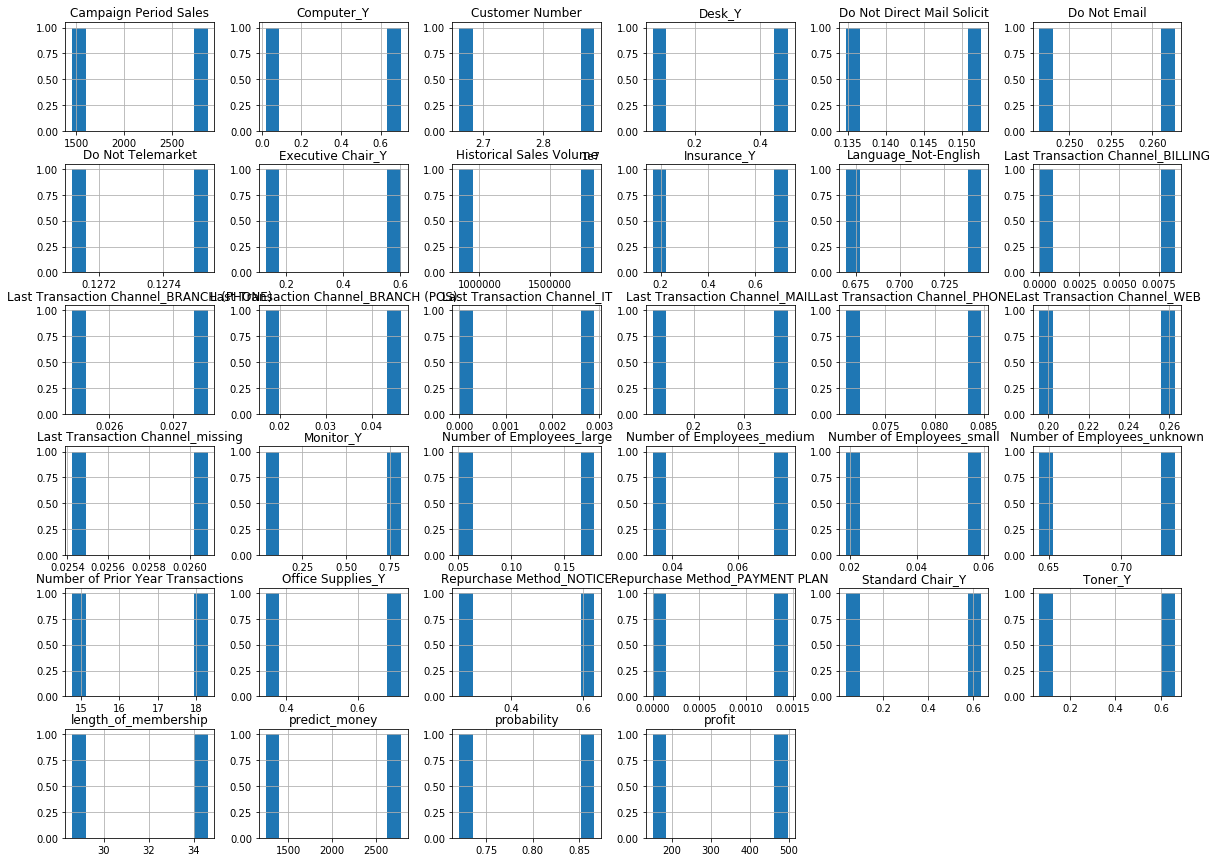

In [1384]:
X_train.loc[X_train['decile'] == 10].groupby("Printer_Y").mean().hist(figsize=(20,15));

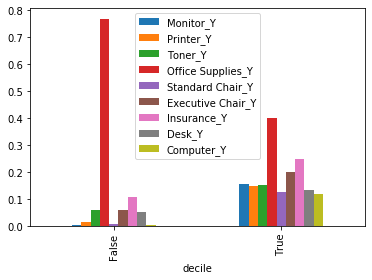

In [1391]:
prods = ["Monitor_Y","Printer_Y","Toner_Y","Office Supplies_Y","Standard Chair_Y","Executive Chair_Y","Insurance_Y","Desk_Y","Computer_Y"]
X_train.groupby(X_train['decile'] == 10)[prods].mean().plot(kind="bar")


In [321]:
X_train.loc[X_train['decile'] != 10].describe() 
# I can go back and see what type of products are being brought between decile 10 and other deciles to see if it has affect

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,...,Office Supplies_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English,length_of_membership,predict_money,probability,profit
count,7.271000e+03,7271.000000,7.271000e+03,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.0,7271.000000,...,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000
mean,2.045721e+07,108.981790,6.253675e+05,14.097648,0.106588,0.208912,0.096548,0.745014,0.0,0.001100,...,0.752854,0.088984,0.142484,0.521661,0.194059,0.267226,26.021868,111.507380,0.221550,-41.659245
std,1.838689e+07,373.960505,7.829173e+05,7.276998,0.308610,0.406559,0.295362,0.435883,0.0,0.033154,...,0.431382,0.284740,0.349570,0.499565,0.395501,0.442542,9.911392,78.897405,0.144766,6.021563
min,1.638290e+05,0.000000,1.319314e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.049170,-46.789183
25%,9.313885e+06,0.000000,1.924458e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,73.458713,0.142589,-45.069848
50%,1.813798e+07,0.000000,3.899010e+05,16.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,26.000000,96.803871,0.184926,-43.030400
75%,2.694726e+07,0.000000,7.491130e+05,20.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,32.000000,96.803871,0.236380,-41.810379
max,1.672359e+08,5661.666667,1.115963e+07,64.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,528.493333,0.744675,-19.567859


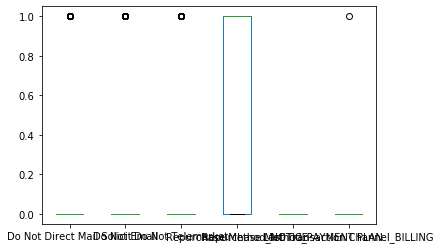

In [322]:
X_train.loc[X_train['decile'] == 10].iloc[:,4:10].plot(kind = 'box')

In [323]:
X_train['binned_historicalsales'] = pd.qcut(X_train['Historical Sales Volume'],10,labels = [i for i in range(1,11)])

C:\Users\micha\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E11D7A2E8>,
      dtype=object)

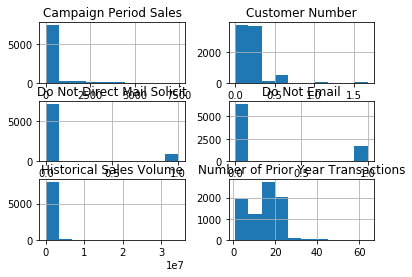

In [324]:
X_train.iloc[:,:6].hist()# the data is really skewed work on normalizing and preprocessing by transformer

(array([1.680e+02, 3.940e+02, 3.450e+02, 2.710e+02, 4.490e+02, 3.660e+02,
        1.860e+02, 4.020e+02, 2.750e+02, 2.080e+02, 6.030e+02, 2.354e+03,
        1.056e+03, 1.664e+03, 1.465e+03, 1.272e+03, 9.200e+02, 7.940e+02,
        3.270e+02, 4.810e+02, 3.800e+02, 3.590e+02, 3.450e+02, 2.470e+02,
        1.100e+02, 2.300e+02, 1.380e+02, 8.900e+01, 8.100e+01, 5.400e+01,
        4.100e+01, 1.700e+01, 2.200e+01, 1.500e+01, 1.400e+01, 6.000e+00,
        5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 2.  ,  3.84,  5.68,  7.52,  9.36, 11.2 , 13.04, 14.88, 16.72,
        18.56, 20.4 , 22.24, 24.08, 25.92, 27.76, 29.6 , 31.44, 33.28,
        35.12, 36.96, 38.8 , 40.64, 42.48, 44.32, 46.16, 48.  , 49.84,
        51.68, 53.52, 55.36, 57.2 , 59.04, 60.88, 62.72, 64.56, 66.4 ,
        68.24, 70.08, 71.92, 73.76, 75.6 , 77.44, 79.28, 81.12, 82.96,
        84.8 , 86.64,

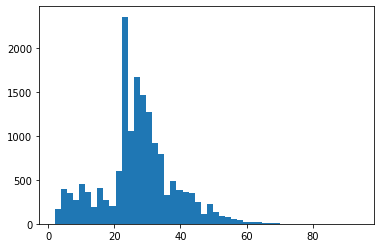

In [325]:
plt.hist(X['length_of_membership'],bins=50)

In [326]:
from sklearn.preprocessing import PowerTransformer
PowerTransformer() # makes more gaussian to meaning make it more normal

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

(array([8.000e+00, 2.500e+01, 9.200e+01, 5.290e+02, 1.599e+03, 2.946e+03,
        2.201e+03, 5.980e+02, 7.900e+01, 2.000e+00]),
 array([ 7.1848674 ,  8.20177262,  9.21867783, 10.23558305, 11.25248826,
        12.26939348, 13.28629869, 14.30320391, 15.32010912, 16.33701434,
        17.35391955]),
 <a list of 10 Patch objects>)

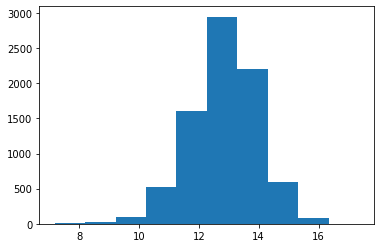

In [327]:
plt.hist(np.log(X_train["Historical Sales Volume"]))

In [328]:
from sklearn.decomposition import PCA

In [329]:
pca_model = PCA(n_components = 2)# want to keep two features

In [186]:
#pca_model.fit(X_train_nsales,y_train_regression)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)

In [187]:
#pca_model.components_

array([[ 9.99995253e-01,  3.08132919e-03, -8.42260269e-08,
         4.13281183e-10,  3.03320418e-10,  3.78449514e-10,
        -2.91392338e-10, -0.00000000e+00,  5.28451055e-11,
        -5.96819557e-11, -5.67773363e-11, -1.01310816e-11,
        -5.10706144e-10,  1.00950053e-10,  3.57519646e-10,
         8.95598906e-11,  3.35844088e-10, -1.48972007e-10,
         1.84765954e-10,  3.14206818e-10,  2.78163817e-10,
         3.25083700e-10,  7.85315547e-10,  1.93531076e-10,
        -7.37743475e-09, -9.27085785e-10, -1.40481525e-09,
        -5.31115074e-09,  8.17558250e-09,  7.37960440e-09,
        -1.26822875e-08],
       [-3.08132919e-03,  9.99995253e-01,  1.16813464e-06,
        -5.80797113e-09, -7.62515837e-09, -5.78599125e-09,
        -6.16738719e-08, -9.87920350e-37,  6.94572561e-11,
        -9.56233921e-10, -7.64992230e-09,  7.97594786e-10,
        -4.15750278e-08,  3.46191878e-09,  9.26294699e-09,
        -1.01400172e-09,  1.25283367e-08,  2.73562342e-08,
         1.90477052e-08,  1.93

In [191]:
#pca_axis= pd.DataFrame(pca_model.components_,index=['p1','p2'],columns=[i for i in range(1,32)])
#pca_axis

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
p1,0.999995,0.003081,-8.422603e-08,4.132812e-10,3.033204e-10,3.784495e-10,-2.913923e-10,-0.000000e+00,5.284511e-11,-5.968196e-11,...,3.250837e-10,7.853155e-10,1.935311e-10,-7.377435e-09,-9.270858e-10,-1.404815e-09,-5.311151e-09,8.175582e-09,7.379604e-09,-1.268229e-08
p2,-0.003081,0.999995,1.168135e-06,-5.807971e-09,-7.625158e-09,-5.785991e-09,-6.167387e-08,-9.879203e-37,6.945726e-11,-9.562339e-10,...,1.817662e-08,2.412666e-08,1.823905e-08,-5.318282e-08,1.125430e-08,-1.264800e-08,-1.506510e-07,8.385794e-08,6.794438e-08,-6.060967e-07


In [330]:
pca_pipe = Pipeline([('pca',PCA(n_components=2)),('forest',RandomForestClassifier(n_estimators=10))])#pca was not effective

In [331]:
pca_pipe.fit(X_train_nsales,y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('forest',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, 

In [332]:
pca_pipe.score(X_train_nsales,y_train)

0.9650946899368734

In [334]:
pca_pipe.score(X_test_nsales,y_test)

0.6760737715063746

In [638]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [639]:
kmeans = KMeans()
sscaler = StandardScaler()

In [640]:
cluster_pipe = Pipeline([('sscaler',sscaler),('kmeans',kmeans)])

In [641]:
xcluster = X.drop('Customer Number',axis=1)

In [642]:
cluster_pipe.fit(xcluster)

Pipeline(memory=None,
         steps=[('sscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [643]:
cluster_pipe.named_steps# to access our step parameters

{'sscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'kmeans': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0)}

In [644]:
res = cluster_pipe.named_steps['kmeans']

In [645]:
X['clusters'] = res.labels_

In [646]:
np.unique(X['labels'])

KeyError: 'labels'

In [354]:
X.columns

Index(['Customer Number', 'Campaign Period Sales', 'Historical Sales Volume',
       'Number of Prior Year Transactions', 'Do Not Direct Mail Solicit',
       'Do Not Email', 'Do Not Telemarket', 'Repurchase Method_NOTICE',
       'Repurchase Method_PAYMENT PLAN', 'Last Transaction Channel_BILLING',
       'Last Transaction Channel_BRANCH (PHONE)',
       'Last Transaction Channel_BRANCH (POS)', 'Last Transaction Channel_IT',
       'Last Transaction Channel_MAIL', 'Last Transaction Channel_PHONE',
       'Last Transaction Channel_WEB', 'Last Transaction Channel_missing',
       'Desk_Y', 'Executive Chair_Y', 'Standard Chair_Y', 'Monitor_Y',
       'Printer_Y', 'Computer_Y', 'Insurance_Y', 'Toner_Y',
       'Office Supplies_Y', 'Number of Employees_large',
       'Number of Employees_medium', 'Number of Employees_small',
       'Number of Employees_unknown', 'Language_Not-English',
       'length_of_membership', 'labels', 'clusters'],
      dtype='object')

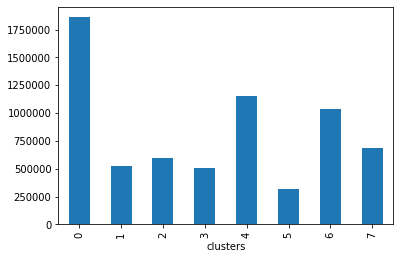

In [375]:
X.groupby('clusters')['Historical Sales Volume'].mean().plot(kind='bar')

In [394]:
params = {'kmeans__n_clusters':[2,3,4,5]}

In [395]:
grid = GridSearchCV(cluster_pipe,param_grid = params,cv=5)

In [396]:
grid.fit(xcluster)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=8, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0))],
                                verbose=False),
             iid='warn', n_jobs=None,
   

In [406]:
X['cluster'] = grid.predict(xcluster)
np.unique(X['cluster'])

array([0, 1, 2, 3, 4])

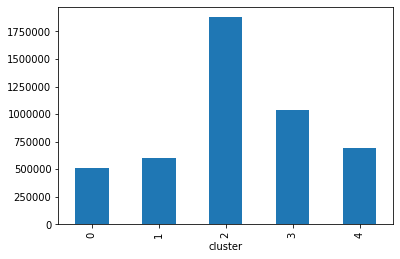

In [407]:
X.groupby('cluster')['Historical Sales Volume'].mean().plot(kind='bar')

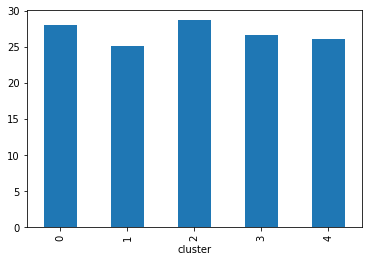

In [408]:
X.groupby('cluster')['length_of_membership'].mean().plot(kind='bar')

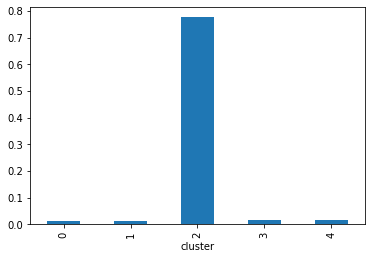

In [410]:
X.groupby('cluster')['Printer_Y'].mean().plot(kind='bar')

In [637]:
X.groupby('cluster')['toner_Y'].mean().plot(kind='bar')

KeyError: 'cluster'